### Import Lib and Read csv

In [118]:
!pip install Sastrawi
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import numpy as np
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
!pip install emot
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

In [120]:
%cd drive/MyDrive/Py Project/TopicModelingJogjaTweet/

[WinError 3] The system cannot find the path specified: 'drive/MyDrive/Py Project/TopicModelingJogjaTweet/'
C:\Users\Acer\Py Belajar Mandiri\Project\klitih


In [121]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [122]:
df0 = pd.read_csv('klitih.csv')
df1 = pd.read_csv('klitih2.csv')
df2 = pd.read_csv('klitih3.csv')
df2.tail()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
8338,8338,1475508499887001600,1475503556740272130,1.640624e+12,2021-12-27 16:46:54,0,NaN,@zxr_arief Klitih sebenarnya dalam Bahasa Jawa...,in,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'zxr_arief', 'name': 'Zxr🦇', ...",NaN,NaN,NaN,NaN
8339,8339,1475508408837103626,1475507772284231685,1.640624e+12,2021-12-27 16:46:32,0,NaN,"KEK APASIK, GAADA KEREN KERENNYA. hobi tuh mbo...",in,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
8340,8340,1475508361378484230,1475464515743404033,1.640624e+12,2021-12-27 16:46:21,0,NaN,@merapi_uncover Sebenernya bapak2 itu kerja ga...,in,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'merapi_uncover', 'name': 'IG...",NaN,NaN,NaN,NaN
8341,8341,1475508157484974080,1475508157484974080,1.640624e+12,2021-12-27 16:45:33,0,NaN,https://t.co/EVA7HMDZwm Buadjingan ik iso2ne...,in,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
8342,8342,1475508119383855105,1475508119383855105,1.640624e+12,2021-12-27 16:45:23,0,NaN,Generasi masa depan Jogja hobinya klitih... Su...,in,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [123]:
df = pd.concat([df0, df1, df2], ignore_index=True)

In [124]:
#select necessary columns
df = df[['tweet','username','name','day','hour']]
df

,tweet,username,name,day,hour
0,@Upil_Jarann Klitih apa??,listszz,Chamomile,3,9
1,@Upil_Jarann Klitih itu apa yaa maaf gak tau o...,ohkasihaaduh,anak ayam,3,9
2,@tooruskies Klitih deng😭,nouYxt,levlaw,3,9
3,@thisisfleti @plumbinq klitih,yyybren,berbrennnn,3,9
4,@idextratime mana bolanya min,fajartujuhbelas,Klitih Me Inside,3,8
...,...,...,...,...,...
12797,@zxr_arief Klitih sebenarnya dalam Bahasa Jawa...,beercantfix,Rumput Tetangga,1,16
12798,"KEK APASIK, GAADA KEREN KERENNYA. hobi tuh mbo...",jjaehyvxn,wle,1,16
12799,@merapi_uncover Sebenernya bapak2 itu kerja ga...,Danuarief_,Danu arief,1,16
12800,https://t.co/EVA7HMDZwm Buadjingan ik iso2ne...,Noturbae09,Not Ur Bae,1,16


### Preprocessing

In [125]:
#function remove hashtags
def hashtags(text):
  hash = re.findall(r"#(\w+)", text)
  return hash

In [126]:
#translate emoji
def emoji(text):
  for emot in UNICODE_EMOJI:
    if text == None:
      text = text
    else:
      text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",", "").replace(":", "").split()))
    return text

In [127]:
#remove retweet username and tweeted at @username
def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) 
    # remove tweeted at
    return tweet

In [128]:
#remove links
def remove_links(tweet):
  '''Takes a string and removes web links from it'''
  tweet = re.sub(r'http\S+', '', tweet) # remove http links
  tweet = re.sub(r'bit.ly/\S+', '', tweet) # remove bitly links
  tweet = tweet.strip('[link]') # remove [links]
  return tweet

In [129]:
def clean_html(text):
  html = re.compile('<.*?>')#regex
  return html.sub(r'',text)

In [130]:
#remove non ascii character
def non_ascii(s):
  return "".join(i for i in s if ord(i)<128)

def lower(text):
  return text.lower()

In [131]:
#remove stopwords
def removeStopWords(str):
#select english stopwords
  cachedStopWords = set(stopwords.words('indonesian'))
#add custom words
  cachedStopWords.update(('ga', 'ora', 'yg', 'email', 'dmn', 'klitih', 'dengan', 'ia', 'bahwa', 'oleh', 'bgt', 'gue', 'kalo', 'nya', 'nih', 'emg', 
                          'aja', 'gw', 'gua', 'dah', 'pa', 'tau', 'dom', 'jg', 'ya', 'udh', 'udah', 'wes', 'sampe', 'jd', 'gitu', 'krn', 'e',
                           'dadi', 'wes', 'banget', 'tp', 'wae', 'yo', 'nek', 'bu','ki', 'amp', 'tuh', 'ma', 'krn', 'nggak', 'neng', 'nggo', 'dadi',
                           'ben', 'po', 'sih', 'iki', 'opo', 'org', 'doang', 'mas', 'ra', 'mung', 'gimana', 'saiki', 'si', 'klo', 'iso', 'ono', 'kui',
                           'meh', 'kaya', 'sek', 'kek', 'dll', 'ng', 'gt', 'trus', 'pie', 'lg', 'utk', 'arep', 'seng', 'tdk', 'sing', 'pas'))
#remove stop words
  new_str = ' '.join([word for word in str.split() if word not in cachedStopWords]) 
  return new_str

In [132]:
def removeStopWordsSastrawi(str):
    stop_factory = StopWordRemoverFactory()
    more_stopword = ['dengan', 'ia','bahwa','oleh', 'ora', 'yg', 'email', 'dmn', 'klitih', 'dengan', 'ia', 'bahwa', 'oleh', 'bgt', 'gue', 'kalo', 'nya', 'nih', 'emg', 
                     'aja', 'gw', 'gua', 'dah', 'pa', 'tau', 'dom', 'jg', 'ya', 'udh', 'udah', 'wes', 'sampe', 'jd', 'gitu', 'krn',
                     'dadi', 'wes', 'banget', 'tp', 'wae', 'yo', 'nek', 'bu','ki', 'amp', 'tuh', 'ma', 'krn', 'nggak', 'neng', 'nggo', 'dadi', 'sama', 'wong', 'gak',
                     'ben', 'po', 'sih', 'iki', 'opo', 'org', 'doang', 'mas', 'ra', 'mung', 'gimana', 'saiki', 'si', 'klo', 'iso', 'ono', 'kui', 'terus', 'bukan', 'mau', 'kan',
                     'meh', 'kaya', 'sek', 'kek', 'dll', 'ng', 'gt', 'trus', 'pie', 'lg', 'utk', 'arep', 'seng', 'tdk', 'sing', 'pas', 'e', 'jadi', 'kalau', 'kok', 'aku'] #, ga
    data = stop_factory.get_stop_words()+more_stopword
    #stopword = stop_factory.create_stop_word_remover()
    new_str = ' '.join([word for word in str.split() if word not in data])
    return new_str

In [133]:
#remove email address, using regex
def email_address(text):
  email = re.compile(r'[\w\.-]+@[\w\.-]+')
  return email.sub(r'',text)

def punct(text):
  token=RegexpTokenizer(r'\w+')#regex
  text = token.tokenize(text)
  text= " ".join(text)
  return text 

In [134]:
#remove digit, special characters, '_'
def remove_digits(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    #when the ^ is on the inside of []; we are matching any character that is not included in this expression within the []
    return re.sub(pattern, '', text)

def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)

def remove_(tweet):
  tweet = re.sub('([_]+)', "", tweet)
  return tweet

In [135]:
#apply all the functions above
df['hashtag'] = df.tweet.apply(func = hashtags)
df['new_tweet'] = df.tweet.apply(func = emoji)
df['new_tweet'] = df.new_tweet.apply(func = remove_users)
df['new_tweet'] = df.new_tweet.apply(func = clean_html)
df['new_tweet'] = df.new_tweet.apply(func = remove_links)
df['new_tweet'] = df.new_tweet.apply(func = non_ascii)
df['new_tweet'] = df.new_tweet.apply(func = lower)
df['new_tweet'] = df.new_tweet.apply(func = email_address)
df['new_tweet'] = df.new_tweet.apply(func = removeStopWords)
#df['new_tweet'] = df.new_tweet.apply(func = removeStopWordsSastrawi)
df['new_tweet'] = df.new_tweet.apply(func = clean_html)
df['new_tweet'] = df.new_tweet.apply(func = punct)
df['new_tweet'] = df.new_tweet.apply(func = remove_)

In [136]:
df.tail(50)

,tweet,username,name,day,hour,hashtag,new_tweet
12752,jadi inget dulu gue awal kuliah dan hidup di j...,bantasani,Lydia Danira,1,17,[],inget kuliah hidup jakal rame2nya klitih wich ...
12753,@kukiekis Maaf kak mau tanya klitih tu apa ya?...,porarrisu,bila,1,17,[],maaf kak tu ya baca tweetnya berani
12754,"@kinderpoyyy sorry,tujuan klitih tu apasi?bner...",MIKASA15689865,nuhinahinu,1,17,[],sorry tujuan tu apasi bneran gatau
12755,"@LordBaal007 daridulu mas kegiatan Klitih ini,...",f_gilik,fgilik,1,17,[],daridulu kegiatan ini ngeri emang
12756,@kinderpoyyy Harusnya mau pulang malem atau ng...,augustadorothea,Dorothea Augusta,1,17,[],pulang malem ngga tetep ngerasa aman dong sala...
12757,@gerurzws Mjb. Aku pernah dapet berita juga di...,hjleova,junlinist yg sering oleng,1,17,[],mjb dapet berita twitter orang mungkin asli jo...
12758,@merapi_uncover @kinderpoyyy Klitih jogja mere...,Gamaboq,gaxxxmaboq,1,17,[],jogja meresahka
12759,Biar dia dihukum oleh kelakuannya sendiri. Sep...,kanvasnda,NdaSudahVaksin,1,17,[],biar dihukum kelakuannya sendiri jalan istighf...
12760,@kinderpoyyy Kenapa ya polisi gabisa beresin g...,sisaktimandra,📷,1,17,[],polisi gabisa beresin gini sampah gini gabisa ...
12761,@jiawyuan @smolju Aku gatau ajig itu apa tp pe...,hjleova,junlinist yg sering oleng,1,17,[],gatau ajig denger orang melukai pengendara bia...


In [137]:
df['tweet'][12786]

'Jogja banyak klitih? Mungkin aku akan menjadi "sir" dari sekarang  https://t.co/hmucXSeuNq'

In [138]:
df['new_tweet'][12786]

'jogja klitih sir'

Function hastags only remove '#', but so many tweet contains '#klitih', which is we dont need this for further process. So we would apply stopwords removal again which is contains 'klitih' that comes from '#klitih'.

In [139]:
df['new_tweet'] = df.new_tweet.apply(func = removeStopWords) #removeStopWords
df['new_tweet'][12786]

'jogja sir'

### EDA

In [140]:
# getting know what inside 'hashtag' col
df.hashtag.value_counts()[1:15].index.tolist()

[['YogyaTidakAman'],
 ['Klitih'],
 ['SriSultanYogyaDaruratKlithih'],
 ['YogyaTidakAman', 'SriSultanYogyaDaruratKlithih'],
 ['klitih'],
 ['YogyaTidakAman', 'Klitih'],
 ['SriSultanYogyaDaruratKlithih', 'YogyaTidakAman'],
 ['Klitih', 'YogyaTidakAman'],
 ['SriSultanYogyaDaruratKlitih'],
 ['JogjaDaruratklitih'],
 ['publisherstory'],
 ['YogyaTidakAman', 'SriSultanYogyaDaruratKlitih'],
 ['YogyaTidakAman', 'yogyadaruratklitih'],
 ['JogjaDaruratKlitih']]

In [141]:
#getting know num of tweet statistics
df['tweet_num'] = df['tweet'].apply(lambda x: len(x.split()))
df['tweet_num'].describe()

count    12802.000000
mean        17.438447
std         12.049361
min          1.000000
25%          8.000000
50%         14.000000
75%         24.000000
max         57.000000
Name: tweet_num, dtype: float64

In [142]:
df['tweet_num'].mode()

0    5
dtype: int64

Text(0.5, 1.0, "Distribution of number of tweet 'klitih' (25 Dec 20 - 5 Jan 21)")

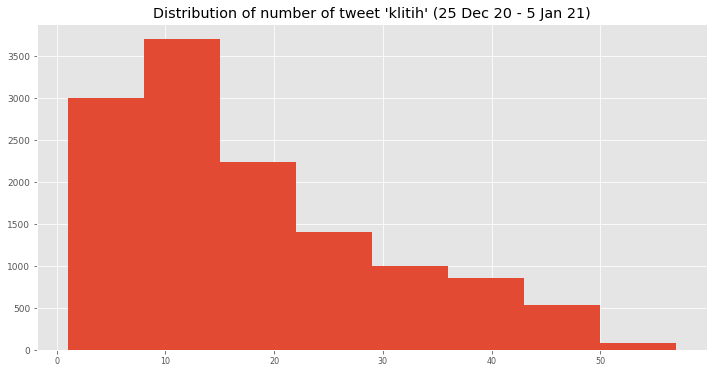

In [143]:
df[['tweet_num']].hist(figsize=(12,6), bins=8, xlabelsize=8, ylabelsize=9)
plt.title("Distribution of number of tweet 'klitih' (25 Dec 20 - 5 Jan 21)")

it's right skewed, we can see that mean=13, but most of tweet ranging between 1-10 words, which ht mode is exactly 5

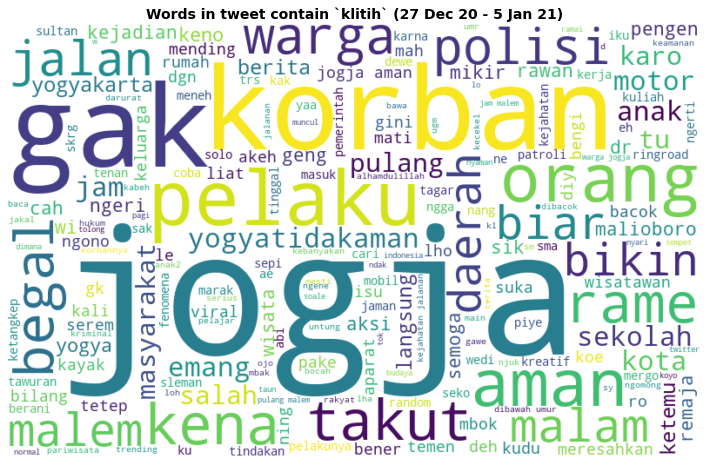

In [144]:
all_words = ''.join([word for word in df['new_tweet']])
all_words
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=200, background_color='white').generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Words in tweet contain `klitih` (27 Dec 20 - 5 Jan 21)' , weight='bold', fontsize=14)
plt.show()

### Bag of Words with Tf_Idf

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")

In [146]:
dtm = vectorizer.fit_transform(df['new_tweet'].values.astype('U'))
dtm

<12802x8605 sparse matrix of type '<class 'numpy.float64'>'
	with 96598 stored elements in Compressed Sparse Row format>

In [147]:
words = np.array(vectorizer.get_feature_names())
print(len(words))

8605


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### NMF (Non Matrix Factorization)

In [148]:
from sklearn.decomposition import NMF
import random

In [149]:
nmf_mod = NMF(n_components=5, random_state=42) #n_components=topics
nmf_mod.fit(dtm)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


NMF(n_components=5, random_state=42)

In [150]:
for index, topic in enumerate(nmf_mod.components_):
  print(f"The TOP 20 words for Topic#{index}")
  print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-20:]])

The TOP 20 words for Topic#0
['pelajar', 'terbuat', 'tinggal', 'wisata', 'nyaman', 'istimewa', 'rawan', 'warga', 'akeh', 'senyum', 'ngeri', 'umr', 'trending', 'pengen', 'solo', 'kota', 'serem', 'aman', 'darurat', 'jogja']
The TOP 20 words for Topic#1


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['mba', 'kah', 'deh', 'nyerang', 'serius', 'gatau', 'geng', 'bang', 'orang', 'serem', 'apas', 'maaf', 'tujuan', 'ap', 'kak', 'nanya', 'mjb', 'ka', 'apaa', 'tu']
The TOP 20 words for Topic#2
['motor', 'bacok', 'ambil', 'ngerampok', 'sejenis', 'korban', 'tujuannya', 'ngambil', 'melukai', 'beda', 'serem', 'kak', 'bedanya', 'geng', 'harta', 'kayak', 'orang', 'barang', 'kah', 'begal']
The TOP 20 words for Topic#3
['ih', 'nder', 'pls', 'ngeri', 'apasih', 'srisultanyogyadaruratklithih', 'ilang', 'psikopat', 'meresahkan', 'inside', 'marak', 'rame', 'ap', 'lag', 'yogyatidakama', 'deh', 'serem', 'anjir', 'trending', 'tih']
The TOP 20 words for Topic#4
['yogya', 'srisultanyogyadaruratklithih', 'yogyakarta', 'daerah', 'yogyatidakama', 'rame', 'anak', 'malam', 'jalan', 'korban', 'aman', 'yogyatidakaman', 'orang', 'pulang', 'jam', 'kena', 'pelaku', 'gak', 'malem', 'takut']


In [151]:
klitih_topic = nmf_mod.transform(dtm)

In [152]:
klitih_topic[1].argsort()

array([0, 3, 1, 2, 4], dtype=int64)

In [153]:
klitih_topiclabels= {0: 'Pelajar/wisata',
                     1: 'Tanya tentang klitih',
                     2: 'Takut',
                     3: 'Penjelasan Klitih',
                     4: 'YogyaTidakAman'}

In [154]:
df['title'] = klitih_topic.argmax(axis=1)

In [155]:
df['topic_label'] = df['title'].map(klitih_topiclabels)

In [156]:
dfnew=df.groupby('title').count()
df.head()

,tweet,username,name,day,hour,hashtag,new_tweet,tweet_num,title,topic_label
0,@Upil_Jarann Klitih apa??,listszz,Chamomile,3,9,[],,3,0,Pelajar/wisata
1,@Upil_Jarann Klitih itu apa yaa maaf gak tau o...,ohkasihaaduh,anak ayam,3,9,[],yaa maaf gak orang sby,11,4,YogyaTidakAman
2,@tooruskies Klitih deng😭,nouYxt,levlaw,3,9,[],deng,3,0,Pelajar/wisata
3,@thisisfleti @plumbinq klitih,yyybren,berbrennnn,3,9,[],,3,0,Pelajar/wisata
4,@idextratime mana bolanya min,fajartujuhbelas,Klitih Me Inside,3,8,[],bolanya m,4,0,Pelajar/wisata


In [157]:
dfnew

,tweet,username,name,day,hour,hashtag,new_tweet,tweet_num,topic_label
title,,,,,,,,,
0,2772,2772,2771,2772,2772,2772,2772,2772,2772
1,360,360,359,360,360,360,360,360,360
2,617,617,617,617,617,617,617,617,617
3,264,264,264,264,264,264,264,264,264
4,8789,8789,8787,8789,8789,8789,8789,8789,8789


In [158]:
klitih_jogjatopics = df.loc[df['title'].isin([0,3,4])]
klitih_jogjatopics.head()

,tweet,username,name,day,hour,hashtag,new_tweet,tweet_num,title,topic_label
0,@Upil_Jarann Klitih apa??,listszz,Chamomile,3,9,[],,3,0,Pelajar/wisata
1,@Upil_Jarann Klitih itu apa yaa maaf gak tau o...,ohkasihaaduh,anak ayam,3,9,[],yaa maaf gak orang sby,11,4,YogyaTidakAman
2,@tooruskies Klitih deng😭,nouYxt,levlaw,3,9,[],deng,3,0,Pelajar/wisata
3,@thisisfleti @plumbinq klitih,yyybren,berbrennnn,3,9,[],,3,0,Pelajar/wisata
4,@idextratime mana bolanya min,fajartujuhbelas,Klitih Me Inside,3,8,[],bolanya m,4,0,Pelajar/wisata


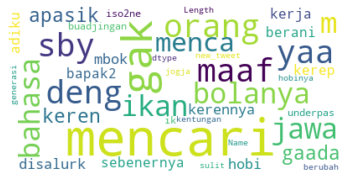

In [159]:
text = str(klitih_jogjatopics.new_tweet)
wordcloud = WordCloud().generate(text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=60, max_words=40, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show() 

### Sentiment analysis using TextBlob

In [160]:
from textblob import TextBlob
from deep_translator import GoogleTranslator

In [162]:
# function to calculate sentiment rate
def sentiment_calc2(text):
    x = TextBlob(text)
    try:
        return x.translate(to='en').sentiment.polarity
    except Exception as e:
        return e

In [163]:
# apply the function above
df['sentiment'] = df['new_tweet'].apply(sentiment_calc2) 

In [164]:
df.head()

,tweet,username,name,day,hour,hashtag,new_tweet,tweet_num,title,topic_label,sentiment
0,@Upil_Jarann Klitih apa??,listszz,Chamomile,3,9,[],,3,0,Pelajar/wisata,Translation API returned and empty response.
1,@Upil_Jarann Klitih itu apa yaa maaf gak tau o...,ohkasihaaduh,anak ayam,3,9,[],yaa maaf gak orang sby,11,4,YogyaTidakAman,-0.5
2,@tooruskies Klitih deng😭,nouYxt,levlaw,3,9,[],deng,3,0,Pelajar/wisata,Translation API returned the input string unch...
3,@thisisfleti @plumbinq klitih,yyybren,berbrennnn,3,9,[],,3,0,Pelajar/wisata,Translation API returned and empty response.
4,@idextratime mana bolanya min,fajartujuhbelas,Klitih Me Inside,3,8,[],bolanya m,4,0,Pelajar/wisata,Translation API returned the input string unch...


In [165]:
df['sentiment'][0]

textblob.exceptions.NotTranslated('Translation API returned and empty response.')

In [166]:
# make a new dataframe
dfsentiment = df.copy()
dfsentiment.head()

,tweet,username,name,day,hour,hashtag,new_tweet,tweet_num,title,topic_label,sentiment
0,@Upil_Jarann Klitih apa??,listszz,Chamomile,3,9,[],,3,0,Pelajar/wisata,Translation API returned and empty response.
1,@Upil_Jarann Klitih itu apa yaa maaf gak tau o...,ohkasihaaduh,anak ayam,3,9,[],yaa maaf gak orang sby,11,4,YogyaTidakAman,-0.5
2,@tooruskies Klitih deng😭,nouYxt,levlaw,3,9,[],deng,3,0,Pelajar/wisata,Translation API returned the input string unch...
3,@thisisfleti @plumbinq klitih,yyybren,berbrennnn,3,9,[],,3,0,Pelajar/wisata,Translation API returned and empty response.
4,@idextratime mana bolanya min,fajartujuhbelas,Klitih Me Inside,3,8,[],bolanya m,4,0,Pelajar/wisata,Translation API returned the input string unch...


In [167]:
# drop non numeric data on sentiment column
dfsentiment = df[pd.to_numeric(dfsentiment['sentiment'], errors='coerce').notnull()]
dfsentiment

,tweet,username,name,day,hour,hashtag,new_tweet,tweet_num,title,topic_label,sentiment
1,@Upil_Jarann Klitih itu apa yaa maaf gak tau o...,ohkasihaaduh,anak ayam,3,9,[],yaa maaf gak orang sby,11,4,YogyaTidakAman,-0.5
5,@thsmmra @convomf banyak klitih contohnya:(,meimeingambis,"anis, aka",3,8,[],contohnya,5,4,YogyaTidakAman,0.0
6,Ntar kalo pelaku klitih makin banyak gara2 dib...,winnerstarlight,Peppa🌻,3,8,[],ntar pelaku gara2 dibilang anak kreatif salah ...,17,4,YogyaTidakAman,0.0
8,@ikhsanudinald @dhuhamr @asumsico monggo para ...,bakulangkring,bakulangkringan,3,8,[],monggo dititeni rupane,9,4,YogyaTidakAman,0.0
9,@nigemizv ke jakal. nangkep klitih,morenossss,potatojio🍟,3,8,[],jakal nangkep,5,4,YogyaTidakAman,0.0
...,...,...,...,...,...,...,...,...,...,...,...
12796,"@anistriayu Punten, seriusan mau nanya, klitih...",Iniians,Iniians,1,16,[],punten seriusan nanya tu kali liat berita thre...,24,2,Takut,-0.333333
12797,@zxr_arief Klitih sebenarnya dalam Bahasa Jawa...,beercantfix,Rumput Tetangga,1,16,[],bahasa jawa mencari mencari mencari ikan menca...,36,4,YogyaTidakAman,-0.3
12798,"KEK APASIK, GAADA KEREN KERENNYA. hobi tuh mbo...",jjaehyvxn,wle,1,16,[],apasik gaada keren kerennya hobi mbok disalurk...,38,0,Pelajar/wisata,0.0
12799,@merapi_uncover Sebenernya bapak2 itu kerja ga...,Danuarief_,Danu arief,1,16,[],sebenernya bapak2 kerja gak berani adiku kerep...,34,4,YogyaTidakAman,0.0


In [168]:
dfsentiment['sentiment'][5]

0.0

In [169]:
# make function to classify sentiment, whether it's positive or negative
def convertSentiment(sentiment):
  if sentiment > 0.0:
    sentiment = 'positif'
  elif sentiment <= 0.0:
    sentiment = 'negatif'
  return sentiment

In [170]:
# applying function above
dfsentiment['sentimentValue'] = dfsentiment.sentiment.apply(func = convertSentiment)

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [171]:
dfsentiment['tweet'][12798]

'KEK APASIK, GAADA KEREN KERENNYA. hobi tuh mbok yo disalurkan ke hal hal yang bagus dan baik, ha nek gini ngerugiin org lain, beban masyarakat. jogja berhati nyaman, tapi masyrakate akeh le gawe ora nyaman (oknum klitih) 👎'

In [172]:
# check if the function succeeded
dfsentiment['sentimentValue'].unique()

array(['negatif', 'positif'], dtype=object)

In [173]:
# get to know how many rows for each class
dfsentiment['sentimentValue'].value_counts()

negatif    7382
positif    3385
Name: sentimentValue, dtype: int64

In [174]:
# make percentage for every values
round((dfsentiment['sentimentValue'].value_counts(float)*100), 2)

negatif    68.56
positif    31.44
Name: sentimentValue, dtype: float64

TypeError: type AxesSubplot doesn't define __round__ method

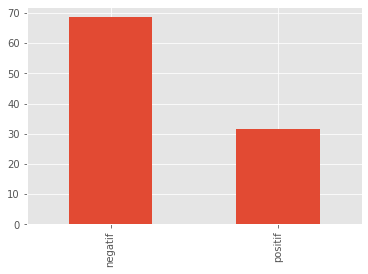

In [179]:
# ploting with matplotlib
round((dfsentiment['sentimentValue'].value_counts(float)*100).plot(kind='bar'), 2)